In [3]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [4]:
@model ENG_MNT_R_PNT begin
    @parameter begin
        d_Rr_ENG_mount = 5215
        k_Rr_ENG_mount = 6.7992e+5
        z_k_Rr_ENG_mount_ini = 0
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "ENG_MNT_R_PNT")
end

ENG_MNT_R_PNT (generic function with 1 method)

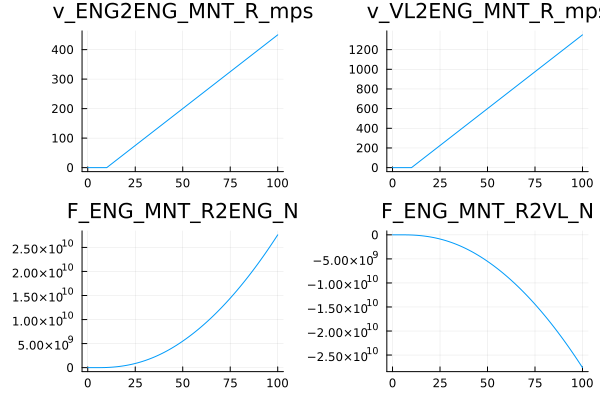

In [5]:
@model testblock begin
    @block begin
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        b1 = ENG_MNT_R_PNT()
    end
    @connect begin
        ramp1.out => b1.v_ENG2ENG_MNT_R_mps
        ramp2.out => b1.v_VL2ENG_MNT_R_mps
    end
    @scope begin
        b1.v_ENG2ENG_MNT_R_mps => v_ENG2ENG_MNT_R_mps
        b1.v_VL2ENG_MNT_R_mps => v_VL2ENG_MNT_R_mps
        b1.F_ENG_MNT_R2ENG_N => F_ENG_MNT_R2ENG_N
        b1.F_ENG_MNT_R2VL_N => F_ENG_MNT_R2VL_N
    end
end
m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))